# TOF Spectra Analysis: Raw data

Analysis notebook to process and plot IMAPlo direct event data, and produce standard plots of the TOF spectra

---
### User Info:
- Double click on a text cell to add comments (comments are input in [markdown](https://www.markdownguide.org/cheat-sheet/))
- whole notebook can be run using the ```>>``` button 
- new cells of code added using: ```esc,b```

When notebook run is complete:
1. Rename Notebook: (double click on datestamped_TOF_Spectra_Raw file name above)
    - recommend including info on the test and files processed
2. Save Notebook: (ctrl-s) file > Save and Checkpoint
3. Print Notebook:  file > Download as > HTML

---
This file was auto generated using the pyMAP db_analysis_generator.

In [1]:
import pandas as pd
import pyMAP as pm
from pyMAP.pyMAP.data.load import dat_loc
%matplotlib notebook

## Load and Process DE Data

load direct event data

In [18]:
# assign 
dfil = dat_loc('R013',home = '../Test Data/Sensor/csv',dtype = 'ILO_RAW_DE')[0]

rawDE = pm.tools.cal.raw_DE_import(dfil,home = '')

Loading ../Test Data/Sensor/csv\EMv1_UNHSPLAT_TofFunctional_TofH2_10kVSpectra_20221206_ILO_RAW_DE.csv


apply cleaning and filtering to raw data

- remove_delay (True/False): Weather or not to subtract the delay line timing from the plotted TOF
- filt_triples (True/False): Weather or not to select for all valid tofs
- checksum (float): all checksum values with magnitute > checksum are discarded
- filt_speed (True/False): Uses the instrument dimensions to calculate an ion speed from the TOF, and filters for
    - ```v[TOF0]<v[TOF2] && v[TOF1]<v[TOF2]```
    - requires ```remove_delay = True```

In [19]:
deData = pm.tof.clean(rawDE,
                      remove_delay = True,
                      filt_triples = True,
                      checksum = 1,
                      filt_speed = False,)

##  Direct Event Spectra Plotting

tofs_1d: generates 1d histogram plots from the given direct event data. reference species lines can be overlayed using the tof_ref_lines parameter, which is passed as input to pyMAP.tof.tof_expected.

tofs_2d: generates 2d histograms of from the provided data. Similar species and energy dependent mass lines can be overlayed 

- bin_range: allows for designation of upper and lower boundaries of histogram bins.   
- tof_ref_lines: the ideal times of flight for the provided species and ke are overplotted as reference lines
- logbins: log spaces the histogram bins, the resulting counts are then given as a density

<IPython.core.display.Javascript object>


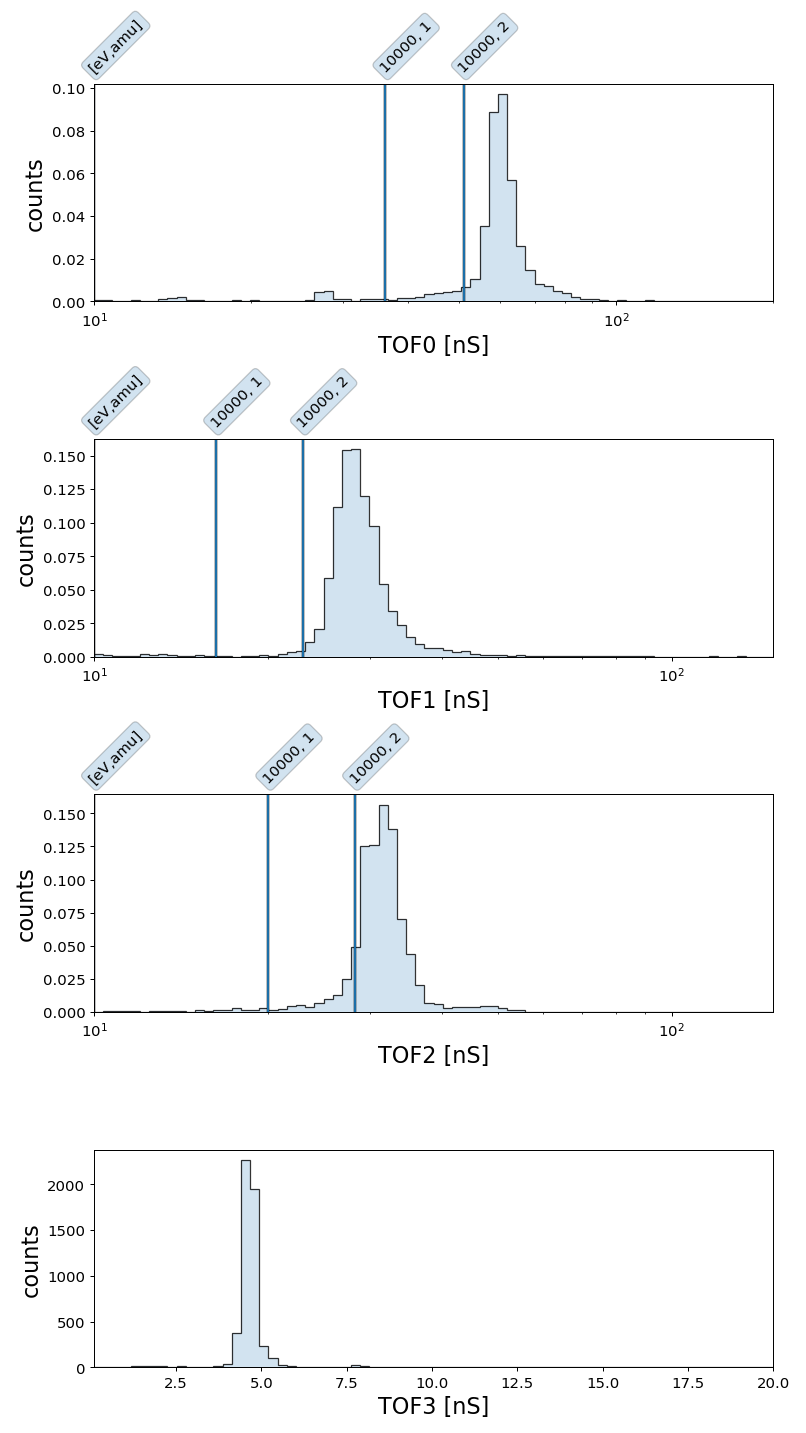

[10, 200]
[10, 150]


<IPython.core.display.Javascript object>


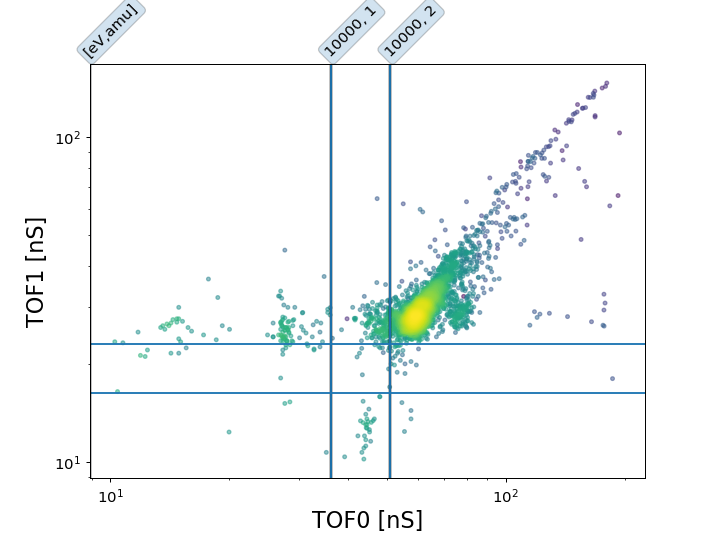

[10, 150]
[10, 150]


<IPython.core.display.Javascript object>


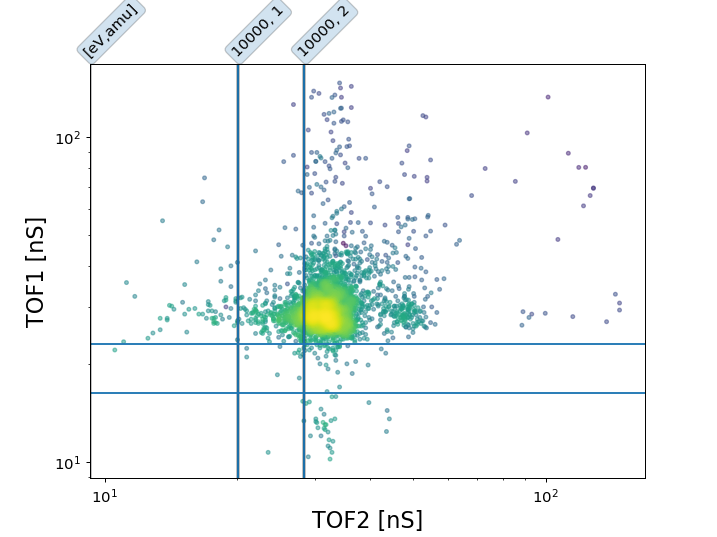

[10, 200]
[10, 150]


<IPython.core.display.Javascript object>


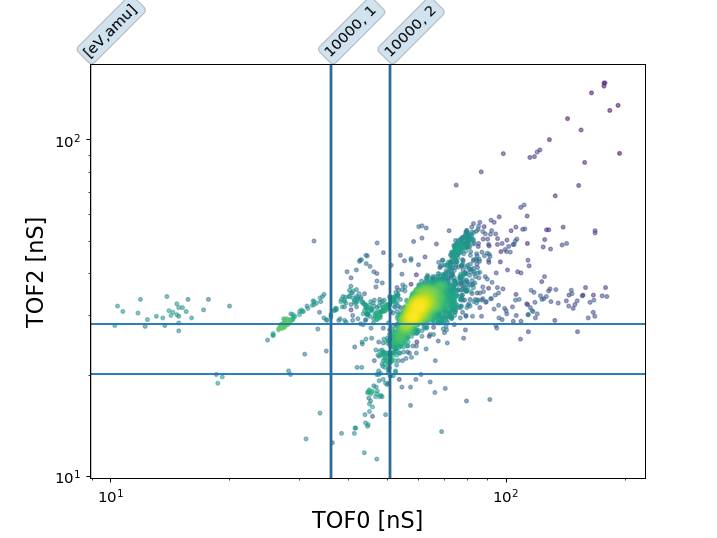

In [22]:
pm.plt.tofs_comprehensive(deData,
                            bin_range = {'TOF0': [10,200],
                                        'TOF1':[10,150],
                                        'TOF2':[10,150],
                                        'TOF3':[.1,20]},
                            tof_ref_lines = {'species':['H','D'],'ke':10000},
                         logbins = True)

### Comments:



## TOF Peak Locations
take the direct events, bin them in 1d, interpolate those spectra and identify the resulting peak location

In [ ]:
pm.tof.fit_tofs(deData,
                    tof_ranges = {'TOF0':[0,100],
                                 'TOF1':[0,40],
                                 'TOF2':[0,50],
                                 'TOF3':[0,16]}).apply(lambda x: x.find_xy(find = 'peak'))

Compared to expected times of flight:

In [1]:
pm.tof.tof_expected(12000,'Ne')

NameError: name 'pm' is not defined

Comments:

## ToF Efficiency

total:

In [ ]:
pm.tof.de_effic(rawDE)

Comments:

## Quadrant distributions

here we define tof3 quad bins count the valid values in each quadrant. Counts in quad 5 fall above the last bin 

In [ ]:
from pyMAP.pyMAP import tof_const

# Define Bin locations
quad_bins = np.array(tof_const.tof3_bins)+2
deData.groupby(np.digitize(deData['TOF3'],quad_bins)).apply(
    lambda x: pd.Series({'bin_start [nS]':quad_bins[x.name-1],'counts':len(x)}))